In [1]:
# Initialize OK
# from client.api.notebook import Notebook
# ok = Notebook('lab05.ok')

# FDS Lab S2-02: Randomness, Sampling and Simulations

Welcome to the week S2-02 lab!

Intended learning outcomes. By the end of this lab you should be able to:
- Sample from probability distributions using numpy functions
- Sample from discrete sets of items
- Run statistical simulations to compute the distribution of a statistic
- Identify samples of convenience and problems with them
- Code more complex statistical processes so that they can be run/sampled from

We will go over simulations and randomness, from the topic on "Randomness, Simulation and Sampling".

Parts of this lab is based on Lab 5 from the Berkley Data 8 course.

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

First, set up the imports by running the cell below.

In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
import pandas as pd
# from datascience import * # This is Data-8 specific - remove it
from scipy.stats import uniform, norm, expon

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')

# Don't change this cell; just run it. 
# from client.api.notebook import Notebook
# ok = Notebook('lab05.ok')

# 1. Sampling from a probability distribution

First we'll test sampling from probability distributions in python. For a uniform distribution between 0 and 1, this can be done using the `np.random.uniform` function. 

**Exercise:** Generate 1000 samples from a uniform distribution using `np.random.uniform` and plot a histogram of the results. Repeat this with more samples (say 10000) and fewer samples (say 100). What do you observe? Hint 1: the size parameter allows you to generate the sample in one line. Hint 2: You should get something that looks like the uniform distribution in Figure 1 of the Randomness, Simulation and Sampling lecture notes.

(array([10021., 10024.,  9975.,  9952., 10077., 10042.,  9905.,  9892.,
        10108., 10004.]),
 array([3.58162782e-06, 1.00002910e-01, 2.00002238e-01, 3.00001566e-01,
        4.00000894e-01, 5.00000222e-01, 5.99999550e-01, 6.99998879e-01,
        7.99998207e-01, 8.99997535e-01, 9.99996863e-01]),
 <BarContainer object of 10 artists>)

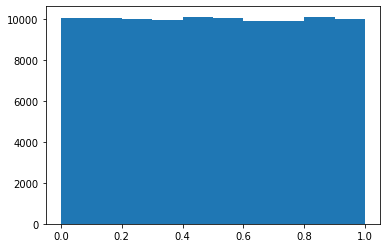

In [3]:
# Your answer
x = np.random.uniform(size=100000)
plt.hist(x, 10)

**Exercise:** Repeat this exercise for  normal and exponential distribution using `np.random.normal` and `np.random.exponential`.

In [4]:
# Your answer

# 1. Sampling from a set of discrete items

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [5]:
nachos = ['cheese', 'salsa', 'both', 'neither']
np.random.choice(nachos)

'salsa'

### Sampling with replacement

To repeat this process multiple times, pass in an int `n` as the second argument to return `n` different random choices. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 3 times from the `nachos` array.

In [6]:
np.random.choice(nachos, 3)

array(['cheese', 'cheese', 'cheese'], dtype='<U7')

### Sampling without replacement

Let's see what happens when we sample without replacement. Use the `replace=False` option to sample 3 items repeatedly.

In [7]:
np.random.choice(nachos, 3, replace=False)

array(['salsa', 'cheese', 'neither'], dtype='<U7')

To count the number of times a certain type of nacho is randomly chosen, we can use `np.count_nonzero`

### `np.count_nonzero`

`np.count_nonzero` counts the number of non-zero values that appear in an array. When an array of boolean values are passed through the function, it will count the number of `True` values (remember that in Python, `True` is coded as 1 and `False` is coded as 0.)

Run the next cell to see an example that uses `np.count_nonzero`.

**[DCS comment: not sure this bit is needed, though np.count_nonzero is helpful later]**

In [8]:
np.count_nonzero([True, False, False, True, True])

3

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator (e.g. `=`, `<`, ...) and the `np.count_nonzero` method.

<!--
BEGIN QUESTION
name: q11
-->

In [9]:
ten_nachos = ['neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both']
number_cheese = ...
number_cheese

Ellipsis

In [10]:
# ok.grade("q11");

## 2. Statistical simulation

In the lectures, we've defined a statistical simulation as follows:

First, decide on:
- The statistic of interest (mean $\overline{X}$, standard deviation $S$, Total, etc.)
- The population distribution (e.g.~normal with particular mean
  and variance) or set of discrete items
- The sample size (denoted $n$)
- The number of replications $k$

Then simulate according to this procedure:
- For $i$ in $1,\dots, k$
  - Sample $n$ items from the population distribution or set of
    discrete items
  - Compute and store the statistic of interest for this sample
- Generate a histogram of the $k$ stored sample statistics

**Excercise:** Run a statistical simulation of the mean of the exponential distribution with a sample size $n=10$ and $k=10000$ replications. You should end up with a plot that looks like the bottom left plot of Figure 3 in the lecture notes on Randomness, sampling and simulation.   

## 3. Sampling Basketball Data

We will now look in more detail the at sampling from an observed dataset. We’ll guide you through this code, but if you wish to read more about different kinds of samples before attempting this question, you can consult the lecture notes on Randomness, Sampling and Simulation. At the end of this section we will have coded up one repetition of a statistical simulation.

Run the cell below to load player and salary data that we will use for our sampling. 

In [11]:
player_data = pd.read_csv("player_data.csv")
salary_data = pd.read_csv("salary_data.csv")
player_data.head(3)

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,25,HOU,81,459,565,154,60,321,2217
1,Chris Paul,29,LAC,82,376,838,156,15,190,1564
2,Stephen Curry,26,GSW,80,341,619,163,16,249,1900


In [12]:
salary_data.head(3)

,PlayerName,Salary
0,Kobe Bryant,23500000
1,Amar'e Stoudemire,23410988
2,Joe Johnson,23180790


In [13]:
full_data = pd.merge(salary_data, player_data, 
                     left_on="PlayerName", right_on="Name")
full_data.head(3)

,PlayerName,Salary,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,Kobe Bryant,23500000,Kobe Bryant,36,LAL,35,199,197,47,7,128,782
1,Amar'e Stoudemire,23410988,Amar'e Stoudemire,32,TOT,59,329,45,29,38,78,680
2,Joe Johnson,23180790,Joe Johnson,33,BRK,80,384,292,59,14,137,1154


Rather than getting data on every player (as in the tables loaded above), imagine that we had got data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a data frame with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


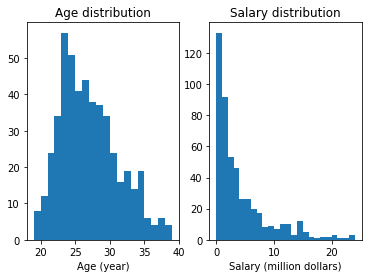

In [14]:
def histograms(t):
    ages = t['Age']
    salaries = t['Salary']/1000000
    t1 = t.drop('Salary', 1)
    t1['Salary'] = salaries
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    plt.subplot(1,2,1)
    plt.hist(t['Age'], bins=age_bins)
    plt.xlabel('Age (year)')
    plt.title('Age distribution')
    plt.subplot(1,2,2)
    plt.hist(salaries, bins=salary_bins)
    plt.xlabel('Salary (million dollars)')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

**Question 1**. Create a function called `compute_statistics` that takes a data frame containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the mean age and mean salary (in that order)

You can call the `histograms` function to draw the histograms! 

*Note:* More charts will be displayed when running the test cell. Please feel free to ignore the charts.

<!--
BEGIN QUESTION
name: q31
-->

In [15]:
# Template
def compute_statistics(age_and_salary_data):
    ...
    age = ...
    salary = ...
    ...
    

full_stats = compute_statistics(full_data)
full_stats

[26.536585365853657, 4269775.766260163]

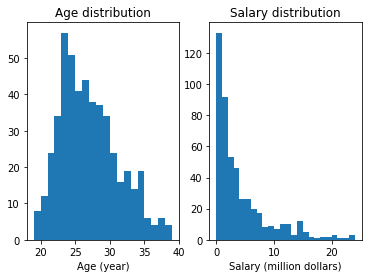

In [16]:
# My answer
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    return([age_and_salary_data['Age'].mean(),
            age_and_salary_data['Salary'].mean()])    

full_stats = compute_statistics(full_data)
full_stats

In [17]:
# ok.grade("q31");

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team who are near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 2.**  Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

<!--
BEGIN QUESTION
name: q32
-->

In [18]:
# Template
convenience_sample = ...
convenience_sample

Ellipsis

In [19]:
# My answer
convenience_sample = full_data[full_data['Age'] < 22]
convenience_sample

,PlayerName,Salary,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
124,Anthony Davis,5607240,Anthony Davis,21,NOP,68,696,149,100,200,95,1656
125,Anthony Bennett,5563920,Anthony Bennett,21,MIN,57,216,48,27,16,36,298
126,Andrew Wiggins,5510640,Andrew Wiggins,19,MIN,82,374,170,86,50,177,1387
141,Michael Kidd-Gilchrist,5016960,Michael Kidd-Gilchrist,21,CHO,55,416,77,30,38,63,598
147,Jabari Parker,4930560,Jabari Parker,19,MIL,25,138,42,31,5,47,308
155,Bradley Beal,4505280,Bradley Beal,21,WAS,63,241,194,76,18,123,962
159,Otto Porter,4470480,Otto Porter,21,WAS,74,221,65,44,30,52,445
170,Aaron Gordon,3992040,Aaron Gordon,19,ORL,47,169,33,21,22,38,243
183,Alex Len,3649920,Alex Len,21,PHO,69,454,32,34,105,74,432
184,Dante Exum,3615000,Dante Exum,19,UTA,82,131,198,41,14,118,393


In [20]:
# ok.grade("q32");

**Question 3.** Assign `convenience_stats` to an array of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

<!--
BEGIN QUESTION
name: q33
-->

In [21]:
# Template
convenience_stats = ...
convenience_stats

Ellipsis

[20.363636363636363, 2383533.8181818184]

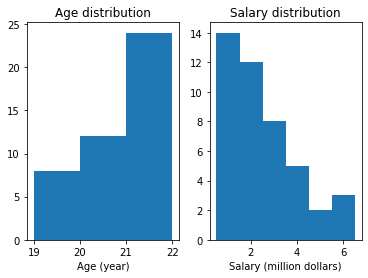

In [22]:
# My answer
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [23]:
# ok.grade("q33");

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `bin_column` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell does not require any changes; **just run it**.

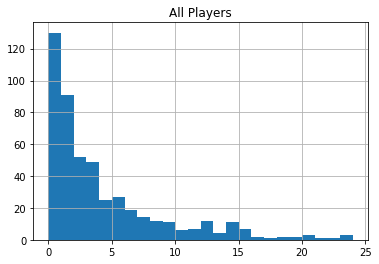

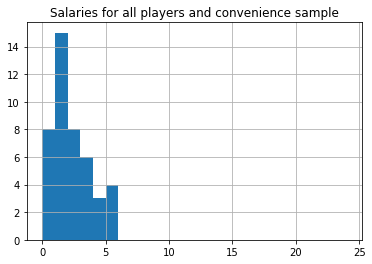

In [24]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two data frames."""
    first_salary_in_millions = first['Salary']/1000000
    second_salary_in_millions = second['Salary']/1000000
    first_tbl_millions = first.drop('Salary', 1)
    first_tbl_millions[first_title] = first_salary_in_millions
    second_tbl_millions = second.drop('Salary', 1)
    second_tbl_millions[second_title] = second_salary_in_millions
    max_salary = max(np.append(first_tbl_millions[first_title], 
                               second_tbl_millions[second_title]))
    bins = np.arange(0, max_salary+1, 1)
    first_binned = first_tbl_millions.hist(first_title, bins=bins)
    second_binned = second_tbl_millions.hist(second_title, bins=bins)
    # first_binned.join('bin', second_binned).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

**Question 4.** Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general?  Before you move on, write a short answer in English below.  You can refer to the statistics calculated above or perform your own analysis.

*Write your answer here, replacing this text.*

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The data frame method `sample` produces a random sample from the data frame. By default, it draws at random **without replacement** from the rows of a table. It takes in the sample size as its argument and returns a **data frame** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [25]:
# Just run this cell

salary_data.sample(5, replace=True)

,PlayerName,Salary
86,Ersan Ilyasova,7900000
349,C.J. Wilcox,1109760
103,Drew Gooden,6680000
162,Jared Dudley,4250000
68,Tyrus Thomas,9388000


The optional argument `replace=True` is passed to `sample()` to specify that the sample should be drawn with replacement.

Run the cell below to see an example call to `sample()` with a sample size of 5, without replacement.

In [26]:
# Just run this cell

salary_data.sample(5, replace=False)

,PlayerName,Salary
13,Zach Randolph,16500000
191,Damian Lillard,3340920
357,Alonzo Gee,1063384
463,Langston Galloway,235762
277,Adreian Payne,1855320


**Question 5.** Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

- How much does the average age change across samples? 
- What about average salary?

In [27]:
my_small_srswor_data = ...
my_small_stats = ...
my_small_stats

Ellipsis

[26.977272727272727, 4858911.363636363]

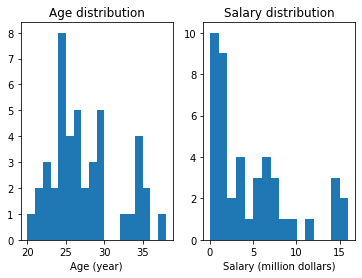

In [28]:
# Answer
my_small_srswor_data = full_data.sample(44, replace=False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

*Write your answer here, replacing this text.*

**Question 6.** As in the previous question, analyze several simple random samples of size 100 from `full_data`.  
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

In [29]:
my_large_srswor_data = ...
my_large_stats = ...
my_large_stats

Ellipsis

[26.94, 3733239.47]

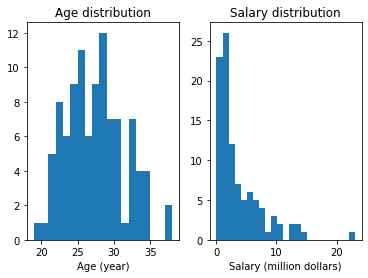

In [30]:
# My answer
my_large_srswor_data = full_data.sample(100, replace=False)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats

*Write your answer here, replacing this text.*

**[DCS Comment: delete from here on. I'll do this in future, but this is to show you how the Berkley labs end, which is a bit interesting. You may need to go View->Cell Toolbar and then select "Edit Metadata" to edit and delete the cells.]**

## 5. Statistical simulations of baseball data

**Excercise** In the example above, you've worked out how to sample from a set of discrete items (the Baseball player salaries) and compute the mean of the age and the salary. To complete the simulation we'll taking n samples from the dataset and computing the mean of these samples k times. We'll then plot a distribution of the sampled ages.

(array([ 17.,  59., 115., 208., 199., 181., 153.,  43.,  17.,   8.]),
 array([23.2 , 23.93, 24.66, 25.39, 26.12, 26.85, 27.58, 28.31, 29.04,
        29.77, 30.5 ]),
 <BarContainer object of 10 artists>)

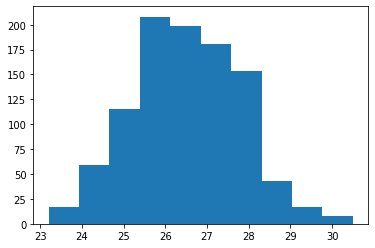

In [31]:
# My answer
k = 10000

# Free up space beforehand
def simulate_srswor_age(n, k):
    mean_age = np.zeros(k)
    for i in range(k):
        my_srswor_data = full_data.sample(n, replace=False)
        mean_age[i] = my_srswor_data['Age'].mean()
    return(mean_age)

mean_age = simulate_srswor_age(10, 1000)
plt.hist(mean_age)

**Exercise:** What happens to the distribution as you change *n*? What happens as you change *k*? Can you explain this?

## 6. Extras - slightly more complex statistical simulations

So far the sampling step of sampling and computing the statistic have been fairly obvious. In this section, we'll look at some some slightly fancier simulations.

**Question 1.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array `p_and_p_words`. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

<!--
BEGIN QUESTION
name: q21
-->

In [32]:
# Template
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = ...

# a for loop would be useful here

longer_than_five

Ellipsis

In [33]:
# My answer
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

In [34]:
longer_than_five = np.sum([len(x) > 5 for x in p_and_p_words])
# a for loop would be useful here

longer_than_five

35453

**Question 2.** Using a simulation with 10,000 trials, assign num_different to the number of times, in 10,000 trials, that two words picked uniformly at random (with replacement) from Pride and Prejudice have different lengths. 

*Hint 1*: What function did we use in section 1 to sample at random with replacement from an array? 

*Hint 2*: Remember that `!=` checks for non-equality between two items.

<!--
BEGIN QUESTION
name: q22
-->

In [36]:
## Template
trials = 10000
num_different = ...

for ... in ...:
    ...
num_different

SyntaxError: cannot assign to Ellipsis (<ipython-input-36-178792419d6a>, line 5)

In [37]:
## My answer
trials = 10000
num_different = 0

for i in range(trials):
    sample_words = np.random.choice(p_and_p_words, 2)
    if (len(sample_words[0]) != len(sample_words[1])): 
        num_different = num_different + 1
num_different

8663

We could use our statistical simulation procedure to find distribution of the `num_different` statistic by repeating this for many repetitions. Why would we want to do this rather than comparing the lengths of every pair of words in the book? Think about how many pairs that would be.

We can also use `np.random.choice` to simulate multiple trials.

**Question 3.** Allie is playing darts. Her dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates her total score after 1000 dart throws.

*Hint:* First decide the possible values you can take in the experiment (point values in this case). Then use `np.random.choice` to simulate Allie's throws. Finally, sum up the scores to get Allie's total score.

<!--
BEGIN QUESTION
name: q23
-->

In [38]:
## Template
possible_point_values = ...
num_throws = 1000
simulated_throws = ...
total_score = ...
total_score

Ellipsis

In [39]:
## My answer
possible_point_values = np.arange(1, 10, 1)
num_throws = 1000
simulated_throws = np.random.choice(possible_point_values, size=num_tosses)
total_score = sum(simulated_throws)
total_score

NameError: name 'num_tosses' is not defined

In [40]:
# ok.grade("q23");

Congratulations, you're done with Lab 5!  Be sure to 
- **Run all the tests** (the next cell has a shortcut for that). 
- **Save and Checkpoint** from the `File` menu.
- **Run the cell at the bottom to submit your work**.
- And ask one of the staff members to check you off.

In [41]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

FileNotFoundError: [Errno 2] No such file or directory: 'tests'

In [42]:
_ = ok.submit()

NameError: name 'ok' is not defined